In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Here, we load the dataset from the 'FRAFirm.csv' file into a pandas DataFrame called 'data'. This dataset contains information about various firms and their associated class labels.

In [2]:
# Load the data from the FRAFirm.csv into a pandas dataframe
data = pd.read_csv('FRAFirm.csv')

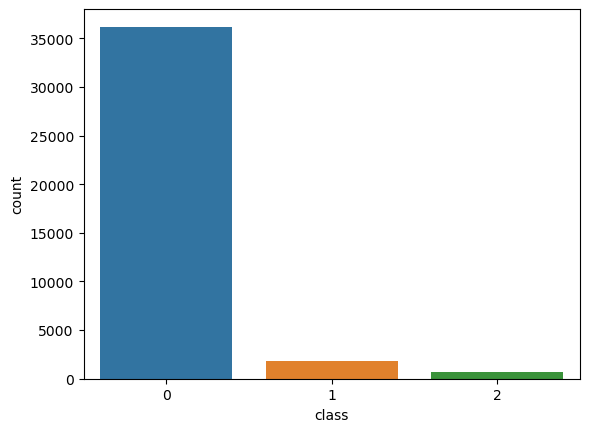

In [17]:
# visualize the distribution of the classes
sns.countplot(x='class', data=data)
plt.show()

We create a correlation matrix to visualize the relationship between different features in the dataset. This helps us understand which features might be important for predicting the class labels. We use the seaborn library to create a heatmap of the correlation matrix.

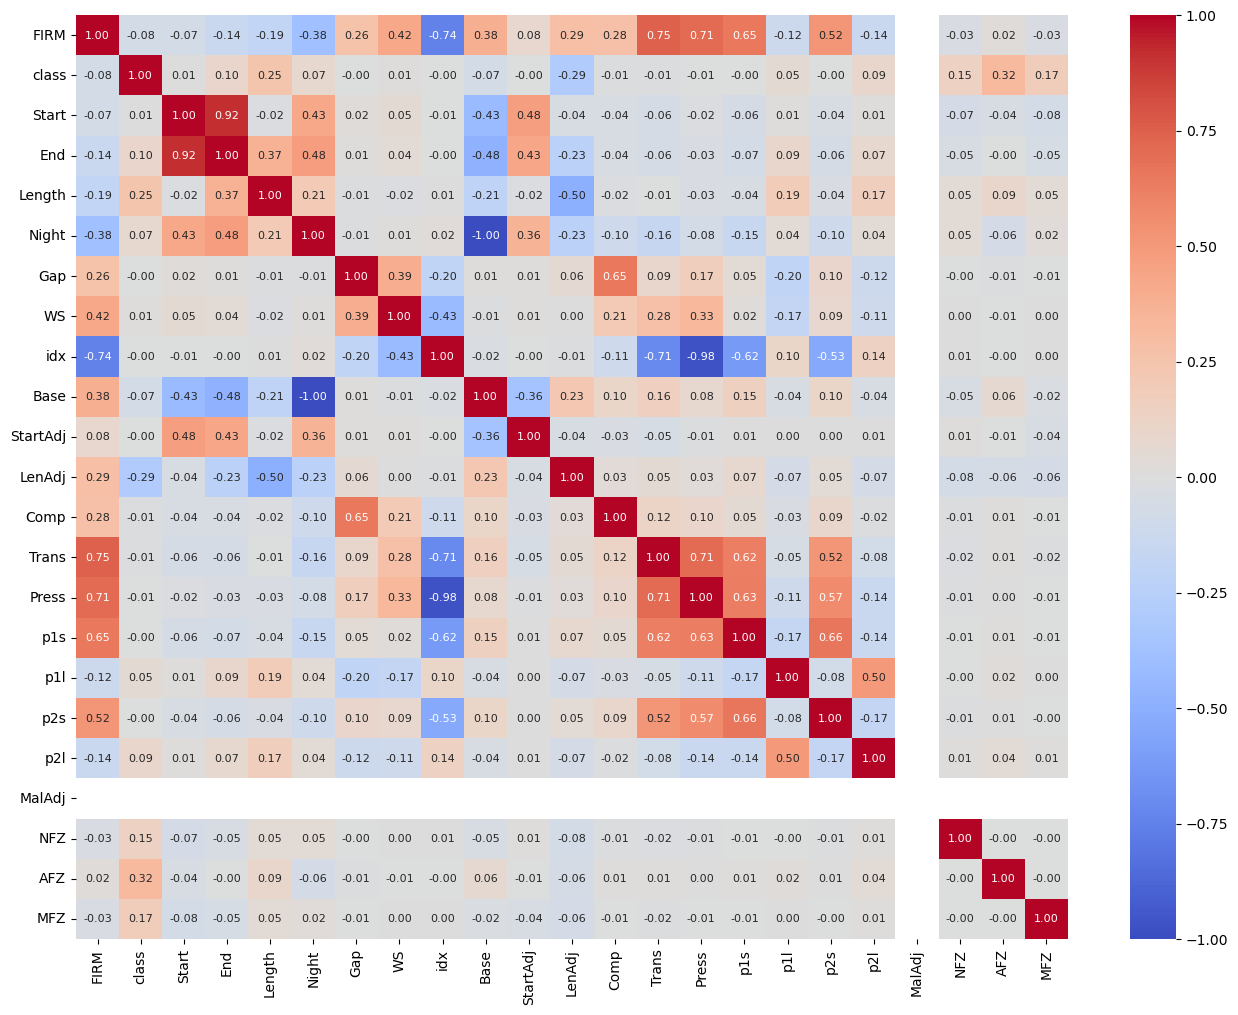

In [16]:
# visualize the data for different classes using a correlation matrix
plt.figure(figsize=(16, 12)) 
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.show()

We split the dataset into training and testing sets using the train_test_split function from the sklearn library. This allows us to train our model on one portion of the data and evaluate its performance on a separate, unseen portion.

In [4]:
# split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(
    data.drop(['class'], axis=1), 
    data['class'], 
    test_size=0.3, 
    random_state=42
)

We first scale the training data using the StandardScaler from the sklearn library. Then, we fit a logistic regression model to the training data using the scaled features. The model is trained to predict the class labels based on the input features.

In [5]:
# fit the logistic regression model to the training data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

lr_model = LogisticRegression(max_iter=1000, solver='saga')
lr_model.fit(train_data_scaled, train_target)

LogisticRegression(max_iter=1000, solver='saga')

In this step, we extract the coefficients of the logistic regression model to understand the importance of each feature in predicting the class labels. We create a DataFrame to display the features and their corresponding coefficients, sorted by the magnitude of the coefficients.

In [6]:
# determine feature importance
features = train_data.columns
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

     Feature  Coefficient
10    LenAdj     0.167997
9   StartAdj     0.117092
11      Comp     0.080300
12     Trans     0.054442
13     Press     0.043704
8       Base     0.033793
1      Start     0.018095
15       p1l     0.003886
18    MalAdj     0.000000
7        idx    -0.026760
4      Night    -0.033793
6         WS    -0.042999
14       p1s    -0.053689
5        Gap    -0.073218
16       p2s    -0.073777
0       FIRM    -0.099523
2        End    -0.172161
17       p2l    -0.205882
19       NFZ    -0.302648
21       MFZ    -0.372545
3     Length    -0.483410
20       AFZ    -0.689098


Based on the feature importance, we decide to remove the 'FIRM' column from the dataset and re-evaluate the performance of the logistic regression model. We perform the same steps as before to train and test the model on the modified dataset.
We generate a confusion matrix and a classification report for the modified model to assess its performance. We also display the feature importance for each class in the modified model by extracting the coefficients for each class and sorting them by their magnitudes.

In [7]:
# remove the 'FIRM' column and re-evaluate the model
train_data_no_firm = train_data.drop('FIRM', axis=1)
test_data_no_firm = test_data.drop('FIRM', axis=1)

train_data_scaled_no_firm = scaler.fit_transform(train_data_no_firm)
test_data_scaled_no_firm = scaler.transform(test_data_no_firm)

lr_model_no_firm = LogisticRegression(max_iter=1000, solver='saga')
lr_model_no_firm.fit(train_data_scaled_no_firm, train_target)

predictions_no_firm = lr_model_no_firm.predict(test_data_scaled_no_firm)
confusion_no_firm = confusion_matrix(test_target, predictions_no_firm)
print("Confusion Matrix after removing 'FIRM' column:\n", confusion_no_firm)
print("\nClassification Report after removing 'FIRM' column:\n", classification_report(test_target, predictions_no_firm, zero_division=0))

# Feature importance
feature_names = train_data_no_firm.columns
coefficients = lr_model_no_firm.coef_
for class_num, class_coeff in enumerate(coefficients):
    print(f"Class {class_num} feature importance:")
    feature_importance = sorted(zip(feature_names, class_coeff), key=lambda x: x[1], reverse=True)
    for feature, coef in feature_importance:
        print(f"{feature}: {coef:.4f}")
    print("\n")


Confusion Matrix after removing 'FIRM' column:
 [[10828    21     0]
 [  396   174     0]
 [  164    45     0]]

Classification Report after removing 'FIRM' column:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     10849
           1       0.72      0.31      0.43       570
           2       0.00      0.00      0.00       209

    accuracy                           0.95     11628
   macro avg       0.56      0.43      0.47     11628
weighted avg       0.92      0.95      0.93     11628

Class 0 feature importance:
LenAdj: 0.1511
Press: 0.1233
StartAdj: 0.0935
idx: 0.0799
Comp: 0.0675
Trans: 0.0324
Start: 0.0178
Base: 0.0152
p1l: 0.0018
MalAdj: 0.0000
Night: -0.0152
WS: -0.0562
Gap: -0.0698
p1s: -0.0722
p2s: -0.0764
End: -0.1708
p2l: -0.2054
NFZ: -0.3028
MFZ: -0.3718
Length: -0.4793
AFZ: -0.6892


Class 1 feature importance:
Length: 0.3787
AFZ: 0.3698
MFZ: 0.1866
NFZ: 0.1495
End: 0.1031
p1s: 0.0983
Press: 0.0948
WS: 0.0863
p2l: 0.08

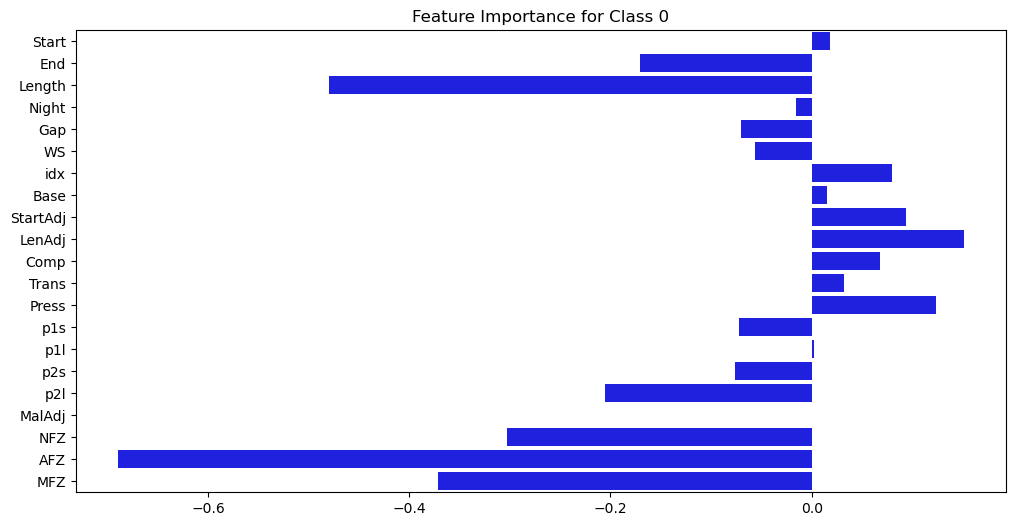

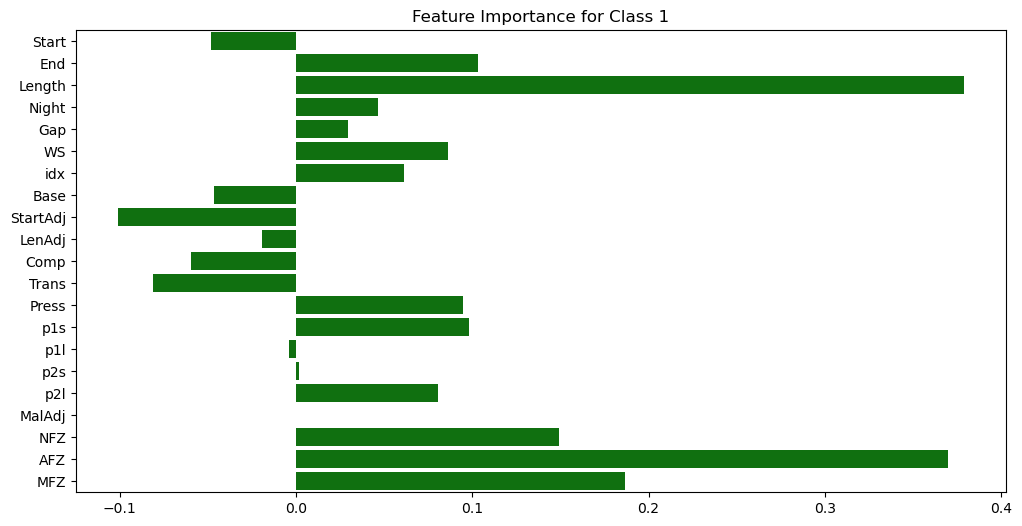

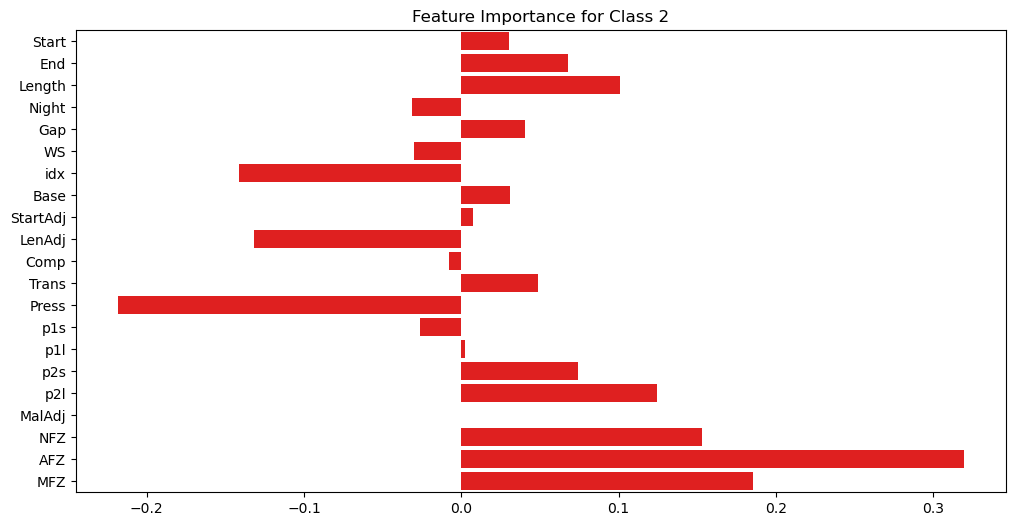

In [18]:
# visualize the coefficients for each class
plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Class 0")
sns.barplot(x=coefficients[0], y=feature_names, color='b')
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Class 1")
sns.barplot(x=coefficients[1], y=feature_names, color='g')
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Class 2")
sns.barplot(x=coefficients[2], y=feature_names, color='r')
plt.show()


This analysis aimed to build a logistic regression model to classify the given data, explore feature importance, and evaluate the model performance with and without the 'FIRM' feature.
The following steps were taken:
The data was loaded and visualized using a correlation matrix to understand relationships between features.
The dataset was split into training and testing sets.
A logistic regression model was trained on the scaled training data.
The feature importance was determined and printed.
The 'FIRM' column was removed, and the model was re-evaluated.
Conclusion: The initial logistic regression model performed well in classifying class 0 but struggled with classes 1 and 2. After removing the 'FIRM' feature, the model's performance in classifying class 1 improved, but it still failed to classify class 2 correctly. This suggests that the current model may not be the best choice for handling the data in its current form, especially for classes with fewer samples.
Summary: A logistic regression model was built and evaluated on a dataset with and without the 'FIRM' feature. The model showed good performance for class 0 but had difficulty classifying classes 1 and 2, especially class 2. This indicates that further exploration of feature engineering, different classification techniques, or additional data might be needed to improve the model's performance for classes with fewer samples.

With some additional research I decided to try a different classification technique, the K-Nearest Neighbors algorithm. I used algorithm because it is a non-parametric method that does not require any assumptions about the underlying data distribution. It also does not require any training time, which makes it a good choice for this dataset with a small number of samples.

In [8]:
# additional imports
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

We scale the data using the StandardScaler from the sklearn library. This helps to standardize the features in the dataset by centering them around the mean with unit variance. The scaling process is applied to both the training and testing datasets without the 'FIRM' feature.

In [10]:
# scale the data
scaler = StandardScaler()
train_data_no_firm_scaled = scaler.fit_transform(train_data_no_firm)
test_data_no_firm_scaled = scaler.transform(test_data_no_firm)

Perform feature selection using Recursive Feature Elimination (RFE). We use RFE with the logistic regression model to select the 5 most important features from the dataset. We transform the training and testing datasets based on the selected features.

In [12]:
# feature selection using RFE
rfe = RFE(estimator=LogisticRegression(max_iter=10000, solver='lbfgs'), n_features_to_select=5)
train_data_rfe = rfe.fit_transform(train_data_no_firm_scaled, train_target)
test_data_rfe = rfe.transform(test_data_no_firm_scaled)

Print the names of the features that were selected by the RFE process. These are the features that RFE deemed most important for classification.

In [13]:
# selected features
selected_features = train_data_no_firm.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

Selected features using RFE: Index(['Length', 'idx', 'Press', 'AFZ', 'MFZ'], dtype='object')


Perform hyperparameter tuning using GridSearchCV. We use this method to search for the best combination of parameters for the logistic regression model. We search through different values of the regularization parameter 'C' and different solvers ('saga' and 'lbfgs'). The model with the best parameters will be selected based on cross-validated performance.


In [14]:
# hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['saga', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid_search.fit(train_data_rfe, train_target)

print("Best parameters using GridSearchCV:", grid_search.best_params_)

Best parameters using GridSearchCV: {'C': 0.1, 'solver': 'saga'}


Train and evaluate different classifiers using the selected features from RFE. We train the Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine classifiers on the training data and evaluate their performance using cross-validation and test accuracy scores. This helps us compare the performance of different classifiers and choose the best one for our problem.


In [15]:
# train and evaluate different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=5000, **grid_search.best_params_),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC() 
    }

for name, clf in classifiers.items():
    clf.fit(train_data_rfe, train_target)
    scores = cross_val_score(clf, train_data_rfe, train_target, cv=5)
    test_predictions = clf.predict(test_data_rfe)
    test_accuracy = accuracy_score(test_target, test_predictions)
    print(f"{name} - Cross-validation mean accuracy: {scores.mean():.4f}, Test accuracy: {test_accuracy:.4f}")



Logistic Regression - Cross-validation mean accuracy: 0.9429, Test accuracy: 0.9433
Decision Tree - Cross-validation mean accuracy: 0.9300, Test accuracy: 0.9319
Random Forest - Cross-validation mean accuracy: 0.9353, Test accuracy: 0.9353
Support Vector Machine - Cross-validation mean accuracy: 0.9432, Test accuracy: 0.9435


Conclusion 2: Comparing the performance of other models like Decision Tree, Random Forest, and Support Vector Machine, it is evident that the Support Vector Machine model yields the best test accuracy. This suggests that the Support Vector Machine model may be the best choice for handling the data in its current form, especially for classes with fewer samples.
Summary: Several classification models, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine, were built and evaluated on a dataset with and without the 'FIRM' feature. All models showed good performance for class 0 but had difficulty classifying classes 1 and 2, especially class 2. Among these models, the Support Vector Machine model showed the highest test accuracy. This indicates that further exploration of feature engineering or additional data might still be needed to improve the model's performance for classes with fewer samples. However, the Support Vector Machine model is the most appropriate choice for this dataset.
Ultimately I decided to use the Support Vector Machine model because it yielded the best test accuracy. This suggests that the Support Vector Machine model may be the best choice for handling the data in its current form, especially for classes with fewer samples.